# Analyse stochastic simulations of parameter sweep ($\xi$)

Author: Juvid Aryaman

In [1]:
import mitonetworks.det as mtd
import mitonetworks.stoch as mts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
mts.reset_plots()

In [5]:
analysis = mts.AnalyseDataFeedbackControl(dir_df_params = '../param_sweep_vals.csv',ctrl_name='lfc',use_xi_ansatz=True, 
        dir_data = '../Data/',plotextensions=['png']
)
    
analysis.make_gradients()
analysis.compute_errors()

In [6]:
analysis.df_params

,b,beta,delta,gamma,kappa,mf_init,ms_init,mu,wf_init,ws_init,xi
0,0.000012,33.12,1.0,0.037851,209.0,160,140,0.023,373,326,0.2
1,0.000012,33.12,1.0,0.037851,406.0,160,140,0.023,373,326,0.4
2,0.000012,33.12,1.0,0.037851,605.0,160,140,0.023,374,326,0.6
3,0.000012,33.12,1.0,0.037851,801.0,160,140,0.023,373,326,0.8


In [7]:
analysis.plotextensions = ['png','svg']

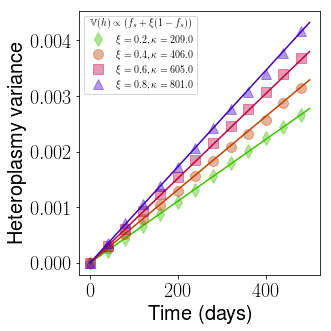

In [9]:
n = len(analysis.df_params)
leg_list = [r"$\xi={0:.1f}, \kappa = {1}$".format(analysis.df_params['xi'][i], analysis.df_params['kappa'][i]) for i in range(n)]
analysis.plot_vh_param_sw(range(n), leg_list,figname="xi_sw_lfc",sparsify_data=True, 
    leg_title=r"$\mathbb{V}(h) \propto (f_s+\xi(1-f_s))$",
                         leg_fontsize=10)